## Optical Recognition of Handwritten Digits

Import the commands pandas, numpy, matplotlib, sklearn.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

Reading the testing and training dataset optdigits.tra and optdigits.tes using pandas function

In [34]:
traindata=pd.read_csv("optdigits.tra",header=None)
testdata=pd.read_csv("optdigits.tes",header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [35]:
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Data Preprocessing

In [62]:
class Preprocessor:
    def __init__(self):
        self.features=[]
    def fit(self,data):
        for i in range(data.shape[1]):
            if np.any(data[:,i]):
                self.features.append(i)
        return data[:,self.features]
    def transform(self,data):
        return data[:,self.features]

def plot_data(data,labels):
    plt.clf()
    color=list(colors.TABLEAU_COLORS.keys())
    plt.figure(figsize=(20,20))
    for x,y,label in zip(data[:,0],data[:,1],labels):
        plt.scatter(x,y,c=color[label],label=label)
        plt.annotate(label,(x,y))
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")

    handles, labels = plt.gca().get_legend_handles_labels()
    legend=[]
    for handle,label in zip(handles,labels):
        legend.append((label,handle))
    legend=sorted(legend,key=lambda x:x[0])
    by_label = OrderedDict(legend)
    plt.legend(by_label.values(), by_label.keys())
    plt.show()
preprocessor=Preprocessor()
x_train=traindata.iloc[:,:-1].values
p_x_train=preprocessor.fit(x_train)
y_train=traindata.iloc[:,-1].values
x_test=testdata.iloc[:,:-1].values
y_test=testdata.iloc[:,-1].values

Implement the k-means clustering algorithm yourself in python. Cluster the training set k=10 and k=20 clusters. Run your clustering algorithm 10 times and report the reconstruction errors on training and test datasets for each run and for each value of k=10 and k=20 (number of clusters). 

In [37]:
class KMeans:
    def __init__(self,k,iterations):
        self.k=k
        self.iterations=iterations
        self.means=[]
    def fit(self,training_data): 
        #Select random data points for k centroids 
        indices=np.random.choice(training_data.shape[0],size=self.k)
        self.means=training_data[indices]
        self.reconstruction_errors=[0]*self.iterations
        #Initialize cluster results
        clusters=np.zeros([len(training_data)])
        for i in range(self.iterations):
            error=0
            for j in range(training_data.shape[0]):
                #Calculate distance between data point and cluster centroids
                distances=np.linalg.norm(training_data[j]-self.means,axis=1)
                #Select the centroid with least distance
                error+=np.min(distances)
                clusters[j]=np.argmin(distances)
            #Recalculate cluster centroids
            for j in range(self.k):
                vectors=training_data[clusters==j]
                self.means[j]=vectors.mean(axis=0)
            self.reconstruction_errors[i]=error
        return clusters

In [38]:
kmeans=KMeans(10,10)
clusters=kmeans.fit(x_train)

In [39]:
kmeans.reconstruction_errors

[130300.57586827799,
 102975.99339859458,
 99916.88136795876,
 98780.48446185386,
 98362.42962349183,
 98329.10057254997,
 98248.73728775521,
 98020.28630524913,
 97680.88431808543,
 97259.78555640117]

In [40]:
kmeans=KMeans(20,10)
clusters=kmeans.fit(x_train)

In [41]:
kmeans.reconstruction_errors

[118271.5426216447,
 92888.17652617737,
 90571.72340765639,
 89904.52502660065,
 89458.64946904365,
 89060.68169053947,
 88464.9333004552,
 88238.89584756645,
 88124.31936717284,
 87992.83408127924]

In [42]:
kmeans=KMeans(10,10)
clusters=kmeans.fit(x_test)

In [43]:
kmeans.reconstruction_errors

[63223.419407239155,
 49618.35304434091,
 47663.56245123156,
 46961.55127339103,
 46237.76427451492,
 45689.32643754628,
 45513.41753888387,
 45425.36428553615,
 45300.285180182254,
 45300.27868842367]

In [44]:
kmeans=KMeans(20,10)
clusters=kmeans.fit(x_test)

In [45]:
kmeans.reconstruction_errors

[55972.53529854181,
 44579.389833351794,
 43207.35838213493,
 42751.909745901045,
 42485.12588497769,
 42242.000424443206,
 42003.05075515284,
 41867.31558926447,
 41804.086743915774,
 41766.36553110792]

Implement PCA (Principal Component Analysis) algorithm. Reduce the dimensionality of the training set by means of computing the parameters required by PCA on the training set. Display the training set using the first two projected dimensions of the dataset and compare with the plot in the textbook.

In [9]:
class PCA:
    def __init__(self):
        pass
    def fit(self,training_data):
        #Compute covariance matrix
        covariance_matrix=np.cov(training_data.transpose())
        #Calculate eigen values and eigen vectors
        eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
        #Sort eigen vectors in the decreasing order of eigenvalues 
        eigen_vectors=eigen_vectors.transpose()
        self.components=eigen_vectors[eigen_values.argsort()[::-1]]
        self.components=self.components.T
    def transform(self,training_data,n_components=2):
        w=self.components[:,:n_components]
        mean=np.mean(training_data,axis=0)
        result=np.zeros((training_data.shape[0],n_components))
        for i in range(training_data.shape[0]):
            result[i]=np.dot(w.T,training_data[i]-mean)
        return np.array(result)

In [47]:
pca=PCA()
pca.fit(p_x_train)
reduced_data=pca.transform(p_x_train)

[[ 12.44580352   4.71301334]
 [ 16.52024584  13.07467011]
 [-18.84671433 -10.71445017]
 ...
 [ 24.11867087  -5.78704883]
 [ 29.35115567   3.41363267]
 [-24.993826   -11.79116904]]


<Figure size 432x288 with 0 Axes>

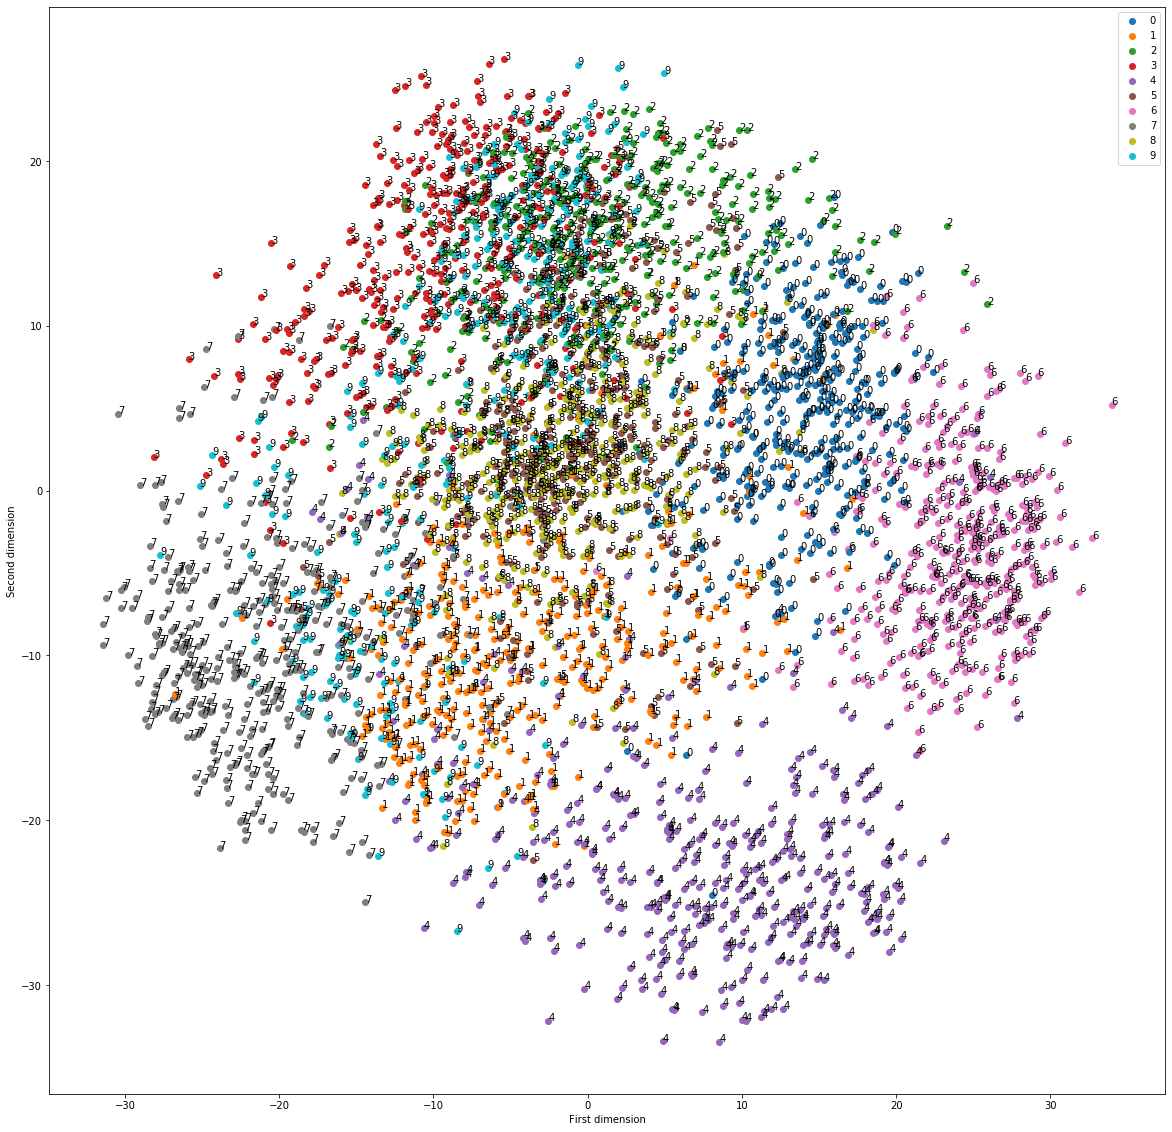

In [48]:
print(reduced_data)
plot_data(reduced_data,y_train)

Implement LDA (Linear Discriminant Analysis) algorithm yourself. Reduce the dimensionality of the training set by means of computing the parameters required by LDA on the training set. Display the training set using the first two projected dimensions of the dataset and compare with the plot in the textbook.

In [49]:
class LDA:
    def __init__(self):
        self.means=None
        self.components=None
    def fit(self,x_train,y_train):
        no_of_features=x_train.shape[1]
        self.means=np.zeros((no_of_features,no_of_features))
        S_B=np.zeros((no_of_features,no_of_features))
        S_W=np.zeros((no_of_features,no_of_features))
        for i in np.unique(y_train):
            self.means[i]=np.mean(x_train[y_train==i],axis=0)
            matrix=np.zeros((no_of_features,no_of_features))
            for row in x_train[y_train==i]:
                row=row.reshape((no_of_features,1))
                mean=self.means[i].reshape((no_of_features,1))
                matrix+=((row-mean).dot((row-mean).T))
            S_W+=matrix
        overall_mean=np.mean(x_train,axis=0)
        overall_mean=mean.reshape((no_of_features,1))
        for i in np.unique(y_train):
            mean_i=self.means[i].reshape((no_of_features,1))
            n=len(x_train[y_train==i])
            S_B+=(n*(mean_i-overall_mean).dot((mean_i-overall_mean).T))
        eigen_values,eigen_vectors=np.linalg.eig(np.dot(np.linalg.inv(S_W),S_B))
        eigen_vectors=eigen_vectors.real
        self.components=eigen_vectors[:,eigen_values.argsort()[::-1]]
    def transform(self,x_train,n_components=2):
        W=self.components[:,:n_components]
        return np.dot(x_train,W)

[[ 0.8844963   1.43516326]
 [ 0.8414734   1.88669463]
 [-0.69237591 -0.93500155]
 ...
 [-2.22830717  0.83868329]
 [-2.22590947  1.09567942]
 [ 0.68052351 -0.82019077]]


<Figure size 432x288 with 0 Axes>

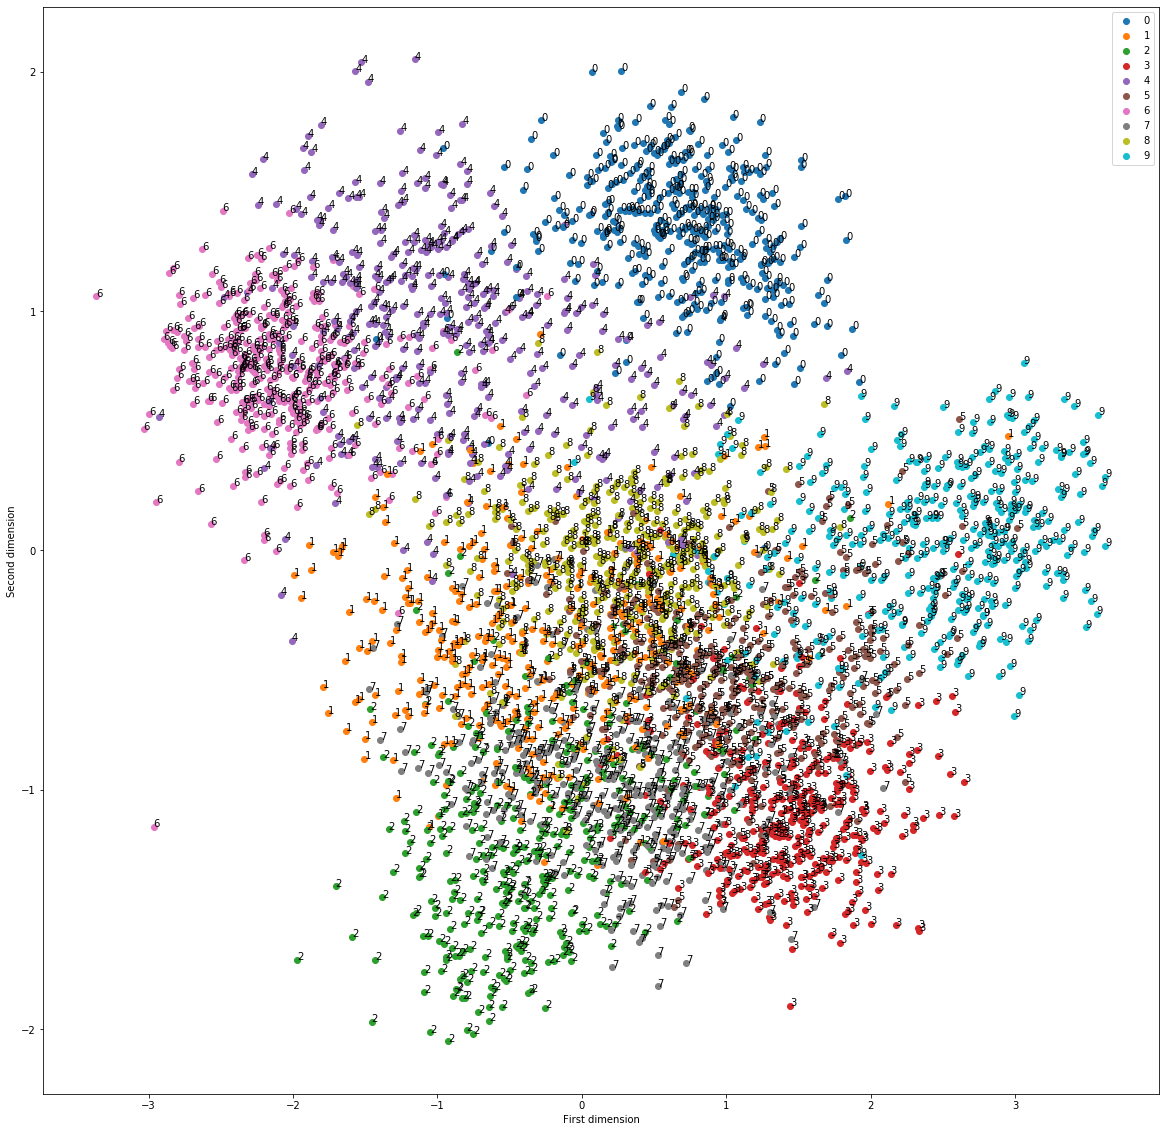

In [55]:
lda=LDA()
lda.fit(p_x_train,y_train)
reduced_data=lda.transform(p_x_train)
print(reduced_data)
plot_data(reduced_data,y_train)

Use knn (k nearest neighbor) classification algorithm with k=3, 5, 15 to predict the class labels (0, 1, 2, …, 9) for the original test set (in 64 dimensions) using the original training set as the training dataset. Compute the confusion matrix and also the test error for each class (0, 1, 2, ….,9) on the test dataset. 

In [74]:
def KNNClassifierResults(x_train,y_train,x_test,y_test,n_neighbors):
    print("Input dimension:",x_train.shape[1])
    error_data=[]
    for n in n_neighbors:
        classifier=KNeighborsClassifier(n_neighbors=n)
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        print("Confusion matrix for n={0}:\n".format(n),confusion_matrix(y_test,y_pred))
        print("\n"*2)
        errors=[]
        for label in np.unique(y_test):
            errors.append(1-accuracy_score(y_test[y_test==label],y_pred[y_test==label]))
        error_data.append(errors)
    df=pd.DataFrame(np.transpose(error_data),columns=["K="+str(n) for n in n_neighbors])
    print("Test error for each class:")
    print(df)
    print("\n"*3)

In [75]:
KNNClassifierResults(x_train,y_train,x_test,y_test,n_neighbors=[3,5,15])

Input dimension: 64
Confusion matrix for n=3:
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   4 173   0   0   0   0   0   0   0]
 [  0   0   0 181   0   0   0   1   1   0]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   1   1 179   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 172   1   6]
 [  0   9   0   1   0   0   0   0 162   2]
 [  0   0   0   4   0   1   0   0   1 174]]



Confusion matrix for n=5:
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   1   0   0   0]
 [  0   3 174   0   0   0   0   0   0   0]
 [  0   1   0 178   0   1   0   1   2   0]
 [  0   1   0   0 179   0   0   0   1   0]
 [  0   0   0   0   1 180   0   0   0   1]
 [  0   0   0   0   0   1 180   0   0   0]
 [  0   0   0   0   0   0   0 173   1   5]
 [  0   8   0   2   0   1   0   0 162   1]
 [  0   0   0   2   1   1   0   0   2 174]]



Confusion matrix for n=15:
 [[178   0   0   0   0   0   0 

PCA projected test set (PCA parameters computed on the training set) in 2, 5, 9 dimensions. 

In [76]:
print("PCA 2 dimensions")
KNNClassifierResults(pca.transform(p_x_train,2),y_train,pca.transform(preprocessor.transform(x_test),n_components=2),y_test,n_neighbors=[3,5,15])
print("PCA 5 dimensions")
KNNClassifierResults(pca.transform(p_x_train,5),y_train,pca.transform(preprocessor.transform(x_test),n_components=5),y_test,n_neighbors=[3,5,15])
print("PCA 9 dimensions")
KNNClassifierResults(pca.transform(p_x_train,9),y_train,pca.transform(preprocessor.transform(x_test),n_components=9),y_test,n_neighbors=[3,5,15])

PCA 2 dimensions
Input dimension: 2
Confusion matrix for n=3:
 [[134   9   5   0   2   8  12   0   8   0]
 [ 20 122   2   0   3  12   1   7   5  10]
 [  5  10  82  31   1  15   0   0   5  28]
 [  0   0  37 104   0  12   0   7   2  21]
 [  1  14   0   2 161   1   2   0   0   0]
 [ 10  34  36  10   2  39   0   0  44   7]
 [ 19   3   0   0   5   0 154   0   0   0]
 [  0  34   3   5   7   7   0 107   1  15]
 [  8  46  19  10   1  31   0   2  50   7]
 [  1  15  60  39   4  12   0  10   6  33]]



Confusion matrix for n=5:
 [[139   3   8   0   2   9  11   0   6   0]
 [ 22 117   4   0   5  12   0  11   6   5]
 [  4   9  84  37   0  13   0   0  10  20]
 [  0   0  31 114   1   9   0   8   7  13]
 [  0  15   0   2 162   0   1   0   0   1]
 [  9  29  30   6   2  47   0   1  52   6]
 [ 20   2   0   0   4   0 155   0   0   0]
 [  0  34   1   4   6   5   0 118   1  10]
 [  7  44  10   4   0  37   0   2  59  11]
 [  0  13  47  41   4  21   0  12   6  36]]



Confusion matrix for n=15:
 [[141   3   8 

LDA projected test set (LDA parameters computed on the training set) in 2, 5, 9 dimensions. 

In [78]:
print("LDA 2 dimensions")
KNNClassifierResults(lda.transform(p_x_train,2),y_train,lda.transform(preprocessor.transform(x_test),n_components=2),y_test,n_neighbors=[3,5,15])
print("LDA 5 dimensions")
KNNClassifierResults(lda.transform(p_x_train,5),y_train,lda.transform(preprocessor.transform(x_test),n_components=5),y_test,n_neighbors=[3,5,15])
print("LDA 9 dimensions")
KNNClassifierResults(lda.transform(p_x_train,9),y_train,lda.transform(preprocessor.transform(x_test),n_components=9),y_test,n_neighbors=[3,5,15])

LDA 2 dimensions
Input dimension: 2
Confusion matrix for n=3:
 [[166   3   0   0   6   0   0   0   2   1]
 [  1  90  19   0   6  15   0  17  28   6]
 [  0  28  97   4   1   4   1  39   3   0]
 [  0   9   8 133   0  17   0  13   3   0]
 [  6  11   0   0 131   0  26   0   4   3]
 [  0  32  15  29   1  70   1   7  11  16]
 [  1  10   0   0  27   0 143   0   0   0]
 [  1  52  25   9   0  22   0  52  14   4]
 [  0  59   0   1  11  27   1   1  72   2]
 [  0   6   3  10   0  18   0   0   4 139]]



Confusion matrix for n=5:
 [[162   3   0   0   9   0   0   0   2   2]
 [  1  86  22   0   4  16   0  16  30   7]
 [  0  23 104   4   1   5   1  38   1   0]
 [  0   7   3 136   0  21   0  13   3   0]
 [  5   5   0   0 135   0  31   0   3   2]
 [  0  29   4  32   1  77   1   8  13  17]
 [  1   7   0   0  23   0 150   0   0   0]
 [  2  44  22  10   1  31   0  53  13   3]
 [  0  45   2   1   9  24   1   4  86   2]
 [  0   2   1   4   0  22   0   0   7 144]]



Confusion matrix for n=15:
 [[163   0   0 

Does using PCA or LDA help with the test error of the knn? If so, for which classes does it help most? 

No. Using PCA or LDA does not help to reduce the test error of the knn.

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split,KFold,RepeatedKFold
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.feature_selection import SelectKBest,chi2,SelectFromModel
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
np.random.seed(2)
pd.set_option('display.max_colwidth',100)

In [2]:
traindata=pd.read_csv("optdigits.tra",header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


Using only classes 1 and 7 and delete all other classes from the dataset

In [3]:
traindata=pd.read_csv("optdigits.tra",header=None)
traindata=traindata[((traindata.iloc[:,-1]==1) | (traindata.iloc[:,-1]==7))]
traindata.replace({7:0},inplace=True)
DIMENSIONS=64
models=[]
data_partitions=[]
kfold=KFold(n_splits=10,shuffle=True,random_state=2)
for train_index,test_index in kfold.split(traindata):
    data_partitions.append((traindata.iloc[train_index,:-1].values,traindata.iloc[train_index,-1].values,traindata.iloc[test_index,:-1].values,traindata.iloc[test_index,-1].values))

In [4]:
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,0
10,0,0,6,14,14,16,16,8,0,0,...,0,0,0,10,12,0,0,0,0,0
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
17,0,0,5,12,16,16,3,0,0,0,...,0,0,0,8,12,0,0,0,0,0
20,0,0,4,11,15,16,15,0,0,0,...,0,0,0,6,14,2,0,0,0,0


Implement the logistic regression (i.e. 1 layer neural network with a single sigmoidal output) algorithm yourself in Python, use adaptive learning rate and momentum for training. Train and test 10 times, each time, start from different random initial weights and use a random subset of 80% of the training data and also start with a different initial learning rate (e.g. 0.0001, 0.005, 0.001, 0.01 etc.) and momentum (0.9, 0.95, 0.99). Report the total training and test errors for each of the 10 runs. Report also the initial learning rate and the momentum you used. Note that you need to replace the 7s in the target column with 0s.

In [5]:
class LogisticRegression:
    def __init__(self,learning_rate,momentum,dimensions,a,b):
        self.learning_rate=learning_rate
        self.momentum=momentum
        self.dimensions=dimensions
        self.weights=np.random.uniform(low=0,high=0.0001,size=(dimensions,1))
        self.a=a
        self.b=b
    def print_model_parameters(self,i):
        print("*"*45)
        print("Run:{0}\nInitial learning rate:{1}\nInitial momentum:{2}".format(i,self.learning_rate,self.momentum))
    def sigmoid_activation(self,x):
        return 1/(1+np.exp(-x))
    def cross_entropy(self,y_true,y_pred):
        return log_loss(y_true,y_pred)
    def train(self,x_train,y_train,n_iter=50):
        #print(x_train.shape)
        errors=[]
        converged=False
        while converged==False and n_iter!=0:
            error=0
            n_iter-=1
            predictions=[]
            temp=np.zeros(shape=(self.dimensions))
            d_weights=np.zeros(shape=(self.dimensions))
            for i in range(x_train.shape[0]):
                o=0
                for j in range(x_train.shape[1]):
                    o+=(self.weights[j]*x_train[i,j])
                y_pred=self.sigmoid_activation(o)
                for j in range(x_train.shape[1]):
                    #d_weights[j]+=learning_rate*(y_train[i]-y_pred)*x_train[i,j]
                    d_weights[j]=(self.learning_rate*(y_train[i]-y_pred)*x_train[i,j])+(self.momentum*d_weights[j])
                predictions.append(y_train[i]-y_pred)
            isDecreasing=True
            errors.append(self.cross_entropy(y_train,np.array(predictions)))
            current_error=errors[-1]
            for i in range(len(errors)-1):
                if errors[i]<=current_error:
                    isDecreasing=False
                    break
            if isDecreasing:
                self.learning_rate+=self.a
            else:
                self.learning_rate-=(self.b*self.learning_rate)
            for j in range(self.dimensions):
                #self.weights[j]+=self.learning_rate*d_weights[j]
                self.weights[j]+=(d_weights[j])
            try:
                if errors[-2]==errors[-1]:
                    converged=True
            except IndexError:
                continue
        self.evaluate("Training",y_train,self.predict(x_train))
    def predict(self,x):
        y_pred=self.sigmoid_activation(np.sum(x*self.weights.T,axis=1))
        y_pred=np.array(y_pred>0.5,dtype=np.int16)
        return y_pred
    def evaluate(self,string,y_true,y_pred):
        print("{0} error rate for run :{1}".format(string,1-accuracy_score(y_true,y_pred)))

Training and Test errors for each of the 10 runs with the initial learning rate and the momentum.

In [7]:
for i in range(10):
    learning_rate=np.random.uniform(low=0.0001,high=0.001)
    momentum=np.random.uniform(low=0.9,high=0.99)
    model=LogisticRegression(learning_rate,momentum,DIMENSIONS,0.0001,0.0002)
    x_train,y_train,x_test,y_test=data_partitions[i]
    model.print_model_parameters(i)
    model.train(x_train,y_train,10)
    models.append(model)
    model.evaluate("Test",y_test,model.predict(x_test))

*********************************************
Run:0
Initial learning rate:0.0004923954119278034
Initial momentum:0.9023333608645102
Training error rate for run :0.015759312320916874
Test error rate for run :0.012820512820512775
*********************************************
Run:1
Initial learning rate:0.000420961853010483
Initial momentum:0.9041111068720861
Training error rate for run :0.015759312320916874
Test error rate for run :0.0
*********************************************
Run:2
Initial learning rate:0.0002934319457176257
Initial momentum:0.9257043360519812
Training error rate for run :0.012893982808022897
Test error rate for run :0.012820512820512775
*********************************************
Run:3
Initial learning rate:0.0009250431507620943
Initial momentum:0.9632037816737753
Training error rate for run :0.005730659025787954
Test error rate for run :0.012820512820512775
*********************************************
Run:4
Initial learning rate:0.0002580391638179397
Initial mo

Using the 10 runs in previous question, for each feature compute feature importance as the average of the absolute value of the logistic regression model weight connected to that specific feature. Eliminate 10%, 25%, 50% of the least important features and train and test again with the same training instances (but with the features you selected) as in Q1. Report and training and test errors for each of the 10 runs and three different levels of feature selection. Did feature selection help? Which features were eliminated for 10% elimination and is there a reason why they were eliminated?

In [8]:
avg_abs_weights=[]
for model in models:
    avg_abs_weights.append(np.abs(model.weights))
avg_abs_weights=np.array(avg_abs_weights)
avg_abs_weights=avg_abs_weights.sum(axis=0)

In [9]:
eliminate_10=avg_abs_weights.argsort(axis=0)[:int(0.9*DIMENSIONS)]
eliminate_25=avg_abs_weights.argsort(axis=0)[:int(0.75*DIMENSIONS)]
eliminate_50=avg_abs_weights.argsort(axis=0)[:int(0.5*DIMENSIONS)]

Feature selection:
Training and Test errors for each of the 10 runs after elimination of 10% of the least important features

In [10]:
for i in range(10):
    learning_rate=np.random.uniform(low=0.0001,high=0.001)
    momentum=np.random.uniform(low=0.9,high=0.99)
    model=LogisticRegression(learning_rate,momentum,eliminate_10.shape[0],0.0001,0.0002)
    x_train,y_train,x_test,y_test=data_partitions[i]
    model.print_model_parameters(i)
    model.train(x_train[:,eliminate_10].reshape(x_train.shape[0],eliminate_10.shape[0]),y_train,10)
    model.evaluate("Test",y_test,model.predict(x_test[:,eliminate_10].reshape(x_test.shape[0],eliminate_10.shape[0])))

*********************************************
Run:0
Initial learning rate:0.0008699886819074396
Initial momentum:0.9180176709412956
Training error rate for run :0.3194842406876791
Test error rate for run :0.3589743589743589
*********************************************
Run:1
Initial learning rate:0.0008310286747364229
Initial momentum:0.9042416709506133
Training error rate for run :0.2722063037249284
Test error rate for run :0.2435897435897436
*********************************************
Run:2
Initial learning rate:0.0009318874924911064
Initial momentum:0.9488630617509457
Training error rate for run :0.333810888252149
Test error rate for run :0.28205128205128205
*********************************************
Run:3
Initial learning rate:0.00034884516528538263
Initial momentum:0.9648582591187477
Training error rate for run :0.26217765042979946
Test error rate for run :0.21794871794871795
*********************************************
Run:4
Initial learning rate:0.0003705070946890872
Initi

Training and Test errors for each of the 10 runs after elimination of 25% of the least important features

In [11]:
for i in range(10):
    learning_rate=np.random.uniform(low=0.0001,high=0.001)
    momentum=np.random.uniform(low=0.9,high=0.99)
    model=LogisticRegression(learning_rate,momentum,eliminate_25.shape[0],0.0001,0.0002)
    x_train,y_train,x_test,y_test=data_partitions[i]
    model.print_model_parameters(i)
    model.train(x_train[:,eliminate_25].reshape(x_train.shape[0],eliminate_25.shape[0]),y_train,10)
    model.evaluate("Test",y_test,model.predict(x_test[:,eliminate_25].reshape(x_test.shape[0],eliminate_25.shape[0])))

*********************************************
Run:0
Initial learning rate:0.0007468674923132592
Initial momentum:0.9101830306927032
Training error rate for run :0.4770773638968482
Test error rate for run :0.4871794871794872
*********************************************
Run:1
Initial learning rate:0.0008951181896967383
Initial momentum:0.9762157598538008
Training error rate for run :0.41690544412607455
Test error rate for run :0.4358974358974359
*********************************************
Run:2
Initial learning rate:0.0003913870158216833
Initial momentum:0.912420232790289
Training error rate for run :0.48137535816618915
Test error rate for run :0.4358974358974359
*********************************************
Run:3
Initial learning rate:0.00010884087127594955
Initial momentum:0.9037609004038181
Training error rate for run :0.18911174785100282
Test error rate for run :0.23076923076923073
*********************************************
Run:4
Initial learning rate:0.0009683528794368668
Init

Training and Test errors for each of the 10 runs after elimination of 50% of the least important features

In [12]:
for i in range(10):
    learning_rate=np.random.uniform(low=0.0001,high=0.001)
    momentum=np.random.uniform(low=0.9,high=0.99)
    model=LogisticRegression(learning_rate,momentum,eliminate_50.shape[0],0.0001,0.0002)
    x_train,y_train,x_test,y_test=data_partitions[i]
    model.print_model_parameters(i)
    model.train(x_train[:,eliminate_50].reshape(x_train.shape[0],eliminate_50.shape[0]),y_train,10)
    model.evaluate("Test",y_test,model.predict(x_test[:,eliminate_50].reshape(x_test.shape[0],eliminate_50.shape[0])))

*********************************************
Run:0
Initial learning rate:0.0009303725582888083
Initial momentum:0.9170287747345163
Training error rate for run :0.502865329512894
Test error rate for run :0.47435897435897434
*********************************************
Run:1
Initial learning rate:0.0005293172721071327
Initial momentum:0.9121856035892043
Training error rate for run :0.44412607449856734
Test error rate for run :0.47435897435897434
*********************************************
Run:2
Initial learning rate:0.0005286262664736112
Initial momentum:0.9190968524630521
Training error rate for run :0.4469914040114613
Test error rate for run :0.5256410256410257
*********************************************
Run:3
Initial learning rate:0.000544734367997459
Initial momentum:0.9425738981319378
Training error rate for run :0.332378223495702
Test error rate for run :0.3205128205128205
*********************************************
Run:4
Initial learning rate:0.0005399547835112365
Initial 

With reporting training and test errors for each of the 10 runs at three different levels of feature selection, it seems that training and test errors does not get down much after removing the features. However, they get more stable with little variation between each of the runs. After examining the elimination of 10% of the least important features, I recognized that they are the features with least difference between the two classes in comparison with the features of other columns.

Use the scikit-learn neural network implementation to train a neural network and test it using the same instances. Increase the test error as much as you can through selection of: different number of hidden layers and units, L1 or L2 regularization/weight decay, different optimization algorithms, feature selection, etc.

In [13]:
parameters={
    'hidden_layer_sizes':[(10,20),(50,30),(100,10,2),(30,10,2)],
    'solver':['adam','sgd'],
    'alpha':[0.0001,0.00001,0.001,0.1]
}
skmodels=[]
worst_params=[]
scores=[]
kbest=[]
tree_selection=[]
for i,(x_train,y_train,x_test,y_test) in enumerate(data_partitions):
    print("\nRun {0}".format(i))
    model=GridSearchCV(MLPClassifier(),param_grid=parameters,n_jobs=-1,cv=RepeatedKFold(n_splits=2,n_repeats=1,random_state=2),verbose=3,scoring='neg_log_loss')
    model.fit(x_train,y_train)
    worst_training_error=model.cv_results_['mean_test_score']
    worst_params.append(model.cv_results_['params'][np.argmin(worst_training_error)])
    test_model=MLPClassifier(**worst_params[-1])
    test_model.fit(x_train,y_train)
    
    scores.append(1-accuracy_score(y_test,test_model.predict(x_test)))
    selector=SelectKBest(chi2,k=45)
    x_train_=selector.fit_transform(x_train,y_train)
    x_test_=selector.transform(x_test)
    test_model.fit(x_train_,y_train)
    kbest.append(1-accuracy_score(y_test,test_model.predict(x_test_)))
    
    selector=SelectFromModel(SVC(kernel='linear'))
    x_train_=selector.fit_transform(x_train,y_train)
    x_test_=selector.transform(x_test)
    test_model.fit(x_train_,y_train)
    tree_selection.append(1-accuracy_score(y_test,test_model.predict(x_test_)))
    
    skmodels.append(model)
scores=np.array(scores)
worst_params=np.array(worst_params)
df=pd.DataFrame({"Test scores":scores,"Parameters":worst_params,"Test error with \nK Best feature selection":kbest,"Test error with \nTree based selection":tree_selection})
print(df)


Run 0
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    6.6s finished



Run 1
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.2s finished



Run 2
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.4s finished



Run 3
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.7s finished



Run 4
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.4s finished



Run 5
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.8s finished



Run 6
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.3s finished



Run 7
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.2s finished



Run 8
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.6s finished



Run 9
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.0s finished


   Test scores  \
0     0.012821   
1     0.012821   
2     0.000000   
3     0.012821   
4     0.012821   
5     0.012821   
6     0.000000   
7     0.441558   
8     0.000000   
9     0.000000   

                                                               Parameters  \
0  {'alpha': 0.001, 'hidden_layer_sizes': (100, 10, 2), 'solver': 'adam'}   
1     {'alpha': 0.1, 'hidden_layer_sizes': (100, 10, 2), 'solver': 'sgd'}   
2    {'alpha': 0.1, 'hidden_layer_sizes': (100, 10, 2), 'solver': 'adam'}   
3   {'alpha': 0.0001, 'hidden_layer_sizes': (30, 10, 2), 'solver': 'sgd'}   
4    {'alpha': 0.001, 'hidden_layer_sizes': (30, 10, 2), 'solver': 'sgd'}   
5     {'alpha': 0.1, 'hidden_layer_sizes': (100, 10, 2), 'solver': 'sgd'}   
6  {'alpha': 0.001, 'hidden_layer_sizes': (100, 10, 2), 'solver': 'adam'}   
7  {'alpha': 0.0001, 'hidden_layer_sizes': (30, 10, 2), 'solver': 'adam'}   
8   {'alpha': 0.0001, 'hidden_layer_sizes': (30, 10, 2), 'solver': 'sgd'}   
9  {'alpha': 0.0001, 'hidden_la